# Subpopulation Identification

This project involves the analysis of two key datasets (Clinical Metadata and Proteomics Dataset) to identify meaningful subpopulations of patients with bladder cancer and to detect features (e.g., proteins) that distinguish these subpopulations. 

### Objectives:
1. **Subpopulation Identification (Level 1):**
   - Design and execute an AI pipeline to cluster patients into meaningful subgroups based on the Proteomics Dataset.
   - Analyze and determine the optimal number of patient subpopulations.

2. **Feature Detection (Level 2):**
   - Employ a feature detection AI algorithm to identify distinguishing features for the identified subpopulations.
   - Propose and implement pipelines for feature selection.

This project is designed to build expertise in data preprocessing, clustering, feature selection, and leveraging clinical insights for advanced AI-driven analysis.

----

## Level 1 - Subpopulation Identification 
In this phase, we are designing and executing an AI pipeline to identify different subpopulations among the 140 patients with varying stages of bladder cancer in the provided Omics dataset.

In [53]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

import matplotlib.pyplot as plt

In [54]:
# import proteomics data and metadata
data = pd.read_csv(r"proteomics.txt", index_col=0, sep='\t')
meta = pd.read_csv(r"metadata.csv", index_col=0)

In [55]:
# inspect data: proteomics data
data

,BC.1,BC.2,BC.3,BC.4,BC.5,BC.6,BC.7,BC.8,BC.9,BC.10,...,BC.131,BC.132,BC.133,BC.134,BC.135,BC.136,BC.137,BC.138,BC.139,BC.140
Protein_ID,,,,,,,,,,,,,,,,,,,,,
A1BG,1.047640e+09,1.113700e+09,1.055760e+09,1.104000e+09,1.158380e+09,9.782630e+08,7.597600e+08,9.394200e+08,1.006398e+09,6.550800e+08,...,9.331577e+08,9.005803e+08,9.199607e+08,9.197231e+08,8.984345e+08,1.060922e+09,9.211745e+08,9.034938e+08,9.445144e+08,9.872748e+08
A2M,1.304314e+10,6.184000e+09,6.564800e+09,4.329400e+09,9.797400e+09,1.265110e+10,9.010200e+09,7.115400e+09,4.890780e+09,5.950800e+09,...,9.201331e+09,9.283483e+09,9.479833e+09,9.446863e+09,9.419578e+09,9.254695e+09,8.989629e+09,9.166813e+09,8.404558e+09,8.388665e+09
AAMDC,3.539580e+07,5.869000e+07,9.091800e+06,4.190800e+07,3.980400e+07,1.917344e+07,4.496800e+07,4.203600e+07,7.410150e+07,5.000200e+07,...,3.935082e+07,3.975648e+07,3.978736e+07,3.953909e+07,4.130073e+07,3.965313e+07,4.205588e+07,3.920024e+07,3.961336e+07,3.940485e+07
AARS1,7.713860e+07,9.650800e+07,4.640600e+07,1.755000e+07,5.665000e+07,2.619320e+07,6.019200e+07,4.029400e+07,6.892560e+07,8.137400e+07,...,4.475108e+07,4.462336e+07,4.443505e+07,4.445612e+07,4.447097e+07,4.707859e+07,4.497541e+07,4.702910e+07,4.459594e+07,4.767205e+07
AASDHPPT,1.322772e+06,9.252078e+06,3.913600e+06,1.687937e+06,5.560375e+06,2.600620e+06,3.940131e+06,6.381148e+06,4.858208e+06,4.889800e+06,...,5.187573e+06,5.466783e+06,4.685309e+06,4.753809e+06,4.825710e+06,4.646577e+06,4.703300e+06,5.754407e+06,4.575239e+06,5.332221e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZADH2,9.264420e+06,2.910213e+06,1.543817e+06,2.494988e+06,5.560051e+05,1.953812e+05,3.315797e+05,4.604085e+05,8.241132e+05,4.095016e+05,...,2.648185e+06,2.538325e+06,2.589668e+06,4.929203e+06,4.142321e+06,3.352999e+06,3.786910e+06,2.621293e+06,2.982408e+06,2.702994e+06
ZFHX3,4.984337e+05,3.593441e+05,6.227843e+05,3.323255e+05,8.482400e+07,1.171280e+07,5.085183e+07,6.985345e+07,4.753620e+07,1.228849e+06,...,3.558565e+07,4.418065e+07,4.050737e+07,4.574220e+07,4.910259e+07,3.594246e+07,4.663867e+07,3.853201e+07,3.607037e+07,3.605619e+07
ZNF185,1.496858e+07,4.789986e+05,3.823402e+05,4.357254e+05,4.351219e+05,2.990498e+05,2.105222e+05,3.419819e+05,1.612386e+07,1.087540e+07,...,9.588074e+06,7.420424e+06,1.115385e+07,1.022180e+07,7.304760e+06,7.468710e+06,7.140596e+06,7.737410e+06,8.751533e+06,8.342621e+06


In [56]:
# inspect data: metadata
meta

,Age,Gender,Smoking_History,Tumor_Size_mm,Histological_Grade,Lymph_Node_Involvement,Metastasis,Treatment,Response_to_Treatment,Follow_up_Duration_months,Survival_Status,Family_History_of_Cancer,Ethnicity
Patient_ID,,,,,,,,,,,,,
BC.1,70,Male,No,31,Low,No,No,Surgery,Complete Remission,25,Survived,No,Caucasian
BC.2,54,Male,Yes,34,Intermediate,No,No,Combination,Complete Remission,40,Survived,Yes,Hispanic
BC.3,53,Male,Yes,39,Intermediate,Yes,No,Chemotherapy,Complete Remission,19,Survived,No,African-American
BC.4,42,Male,No,31,Low,No,No,Radiation,Complete Remission,42,Survived,Yes,Other
BC.5,81,Male,Yes,34,Intermediate,Yes,No,Surgery,Complete Remission,60,Survived,No,Caucasian
...,...,...,...,...,...,...,...,...,...,...,...,...,...
BC.136,50,Male,Yes,127,High,No,No,Radiation,Progressive Disease,56,Deceased,No,Caucasian
BC.137,75,Female,Yes,104,High,No,Yes,Surgery,Partial Remission,18,Deceased,No,Caucasian
BC.138,83,Female,No,143,Low,Yes,No,Radiation,Progressive Disease,55,Deceased,No,Asian


---

We first perform a visual inspection of the datasets at our disposal:

| **Dataset**          | **Shape**           | **Description**                                                    | **Usage**                                                                                  |
|-----------------------|---------------------|--------------------------------------------------------------------|------------------------------------------------------------------------------------------|
| **Proteomics Dataset** | 3121 rows × 140 columns | Contains protein abundance levels across 3,121 proteins for 140 patients. | Enables clustering of patients based on similar molecular profiles, identifying biologically relevant subgroups. |
| **Clinical Metadata** | 140 rows × 13 columns | Provides detailed demographic, clinical, and treatment-related data for each patient. | Facilitates grouping of patients by shared clinical features, such as tumor characteristics and treatment outcomes. |


---
- We then transform numerical values with a log function to reduce skewness, handle outliers, and improve data interpretability and analysis.

In [57]:
data_log10_t = np.log10(data).T # transform proteomics data with log and perform transpose
data_log10_t = data_log10_t.rename_axis('Patient_ID', axis='columns') # Rename the index column correctly
data_log10_t # inspect transposed proteomics data

Patient_ID,A1BG,A2M,AAMDC,AARS1,AASDHPPT,AASS,ABAT,ABCC4,ABCE1,ABCF1,...,YWHAE,YWHAG,YWHAH,YWHAQ,YWHAZ,ZADH2,ZFHX3,ZNF185,ZNF207,ZYX
BC.1,9.020212,10.115382,7.548952,7.887272,6.121485,7.332393,7.208225,6.360749,7.041792,7.392183,...,9.434125,8.875534,8.761668,9.060451,9.882214,6.966818,5.697607,7.175181,7.232531,8.010454
BC.2,9.046768,9.791269,7.768564,7.984563,6.966239,6.500456,6.936725,6.282693,7.092011,6.920468,...,9.273330,8.911829,8.681277,9.019947,9.826412,6.463925,5.555510,5.680334,6.111882,8.466601
BC.3,9.023565,9.817221,6.958650,7.666574,6.592576,6.664642,6.636041,6.539452,6.453838,6.863941,...,9.245246,9.055806,8.843345,9.133328,9.948266,6.188596,5.794338,5.582450,6.532821,8.227177
BC.4,9.042969,9.636428,7.622297,7.244277,6.227356,6.718241,6.858483,6.505168,6.153350,6.811146,...,9.073381,8.820884,8.674935,8.867067,9.527888,6.397068,5.521564,5.639213,7.091679,8.813754
BC.5,9.063851,9.991111,7.599927,7.753200,6.745104,6.985525,6.946059,6.724142,6.901524,6.893140,...,9.409933,8.892083,8.623063,9.171966,9.888393,5.745079,7.928519,5.638611,7.056104,8.329520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BC.136,9.025683,9.966362,7.598278,7.672823,6.667133,7.081084,7.097051,6.777077,6.821143,7.122074,...,9.183876,8.720025,8.464318,8.822431,9.622339,6.525433,7.555608,6.873246,6.969121,8.495487
BC.137,8.964342,9.953742,7.623827,7.652975,6.672403,7.082928,7.095816,6.787200,6.821378,7.124102,...,9.189354,8.741474,8.463842,8.818069,9.622885,6.578285,7.668746,6.853734,7.063833,8.419448
BC.138,8.955925,9.962218,7.593289,7.672367,6.760001,6.941204,6.978693,6.776630,6.828868,7.082787,...,9.177847,8.715352,8.442081,8.818379,9.623420,6.418516,7.585822,6.888596,6.973485,8.420121
BC.139,8.975209,9.924515,7.597842,7.649295,6.660414,6.933568,6.980037,6.942810,6.825158,7.101919,...,9.215701,8.716170,8.442466,8.817743,9.622167,6.474567,7.557151,6.942084,7.039345,8.425608


### PCA

Next, we will apply PCA to the proteomics dataset to identify patterns and explore potential clusters within the data. By projecting the high-dimensional data into a lower-dimensional space, we aim to visualize relationships between patients and detect distinct subgroups. 

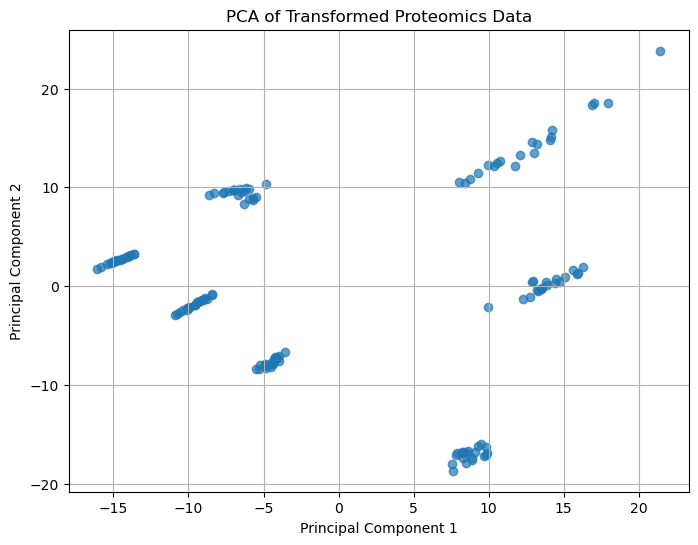

array([0.26541994, 0.21637911])

In [58]:
# PCA
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_result = pca.fit_transform(data_log10_t)

# Convert PCA result into a DataFrame
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'], index=data_log10_t.index)

# Plot PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.title('PCA of Transformed Proteomics Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

# Display the explained variance ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

**Visually, we already observe 7 disctinct cluster.**

### K-Mean Clustering

For the sake of completeness, let's analyze the optimal number K by using the elbow method : 

/Users/marvin/anaconda3/envs/onRampOpenCV/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/marvin/anaconda3/envs/onRampOpenCV/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/marvin/anaconda3/envs/onRampOpenCV/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/marvin/anaconda3/envs/onRampOpenCV/lib/python3.8/site-packages/sklearn/cluster/_kmeans.

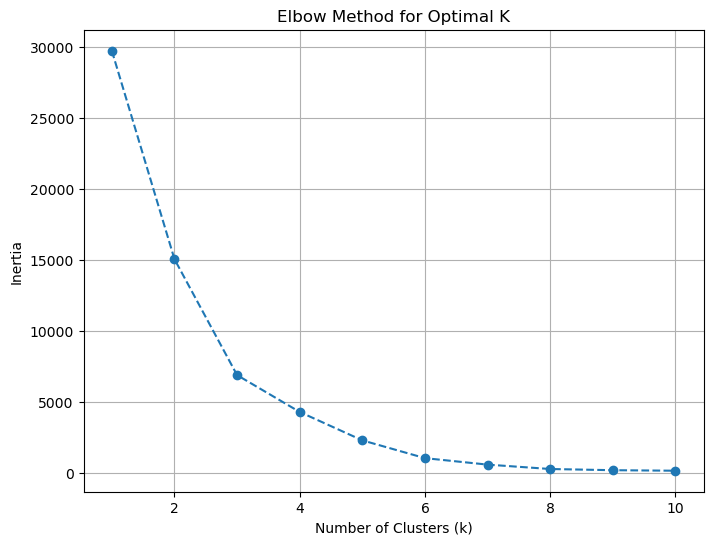

In [59]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Determine the optimal number of clusters using the elbow method
inertia = []
k_values = range(1, 11)


for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()


We observe that the elbow in the plot occurs around k = 4, suggesting that the optimal number of clusters based on the inertia method is likely less than the 7 clusters observed before. 

However, determining the precise number of clusters is not always straightforward from the elbow method alone, as it provides a quantitative but sometimes inconclusive perspective. 

In this case, while the plot suggests 4 clusters, our qualitative assessment from the PCA plot visually indicates the presence of 7 distinct clusters, highlighting the importance of combining both quantitative and qualitative analyses when identifying the optimal number of clusters.

/Users/marvin/anaconda3/envs/onRampOpenCV/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


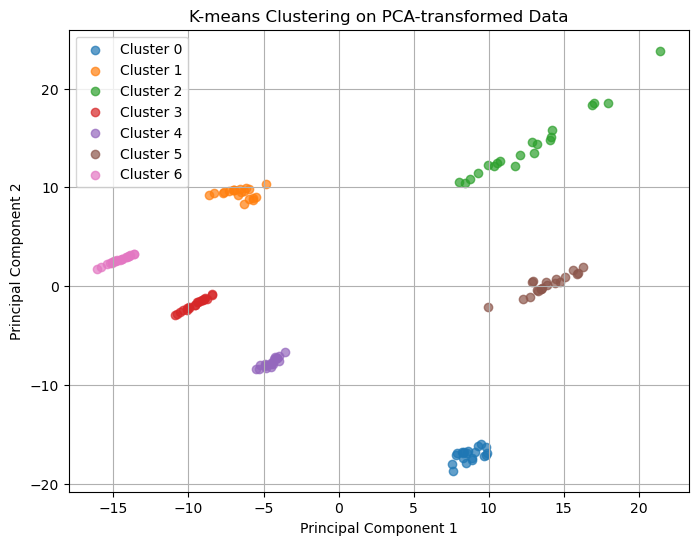

In [60]:
# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_df)

# Add the cluster labels to the PCA DataFrame
pca_df['Cluster'] = kmeans_labels

# Visualize the clusters in the PCA plot
plt.figure(figsize=(8, 6))
for cluster in range(7):
    cluster_points = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_points['PC1'], cluster_points['PC2'], label=f'Cluster {cluster}', alpha=0.7)

plt.title('K-means Clustering on PCA-transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

In [61]:
# Display the cluster assignments
pca_df

,PC1,PC2,Cluster
BC.1,11.726229,12.150759,2
BC.2,13.019515,13.471006,2
BC.3,12.105611,13.288120,2
BC.4,12.911965,14.638459,2
BC.5,14.177556,15.060495,2
...,...,...,...
BC.136,-7.709012,9.438156,1
BC.137,-6.708715,9.230376,1
BC.138,-6.995358,9.708027,1
BC.139,-6.155634,9.902990,1


We see in the above table that each patients has now been assigned a specific cluster. 



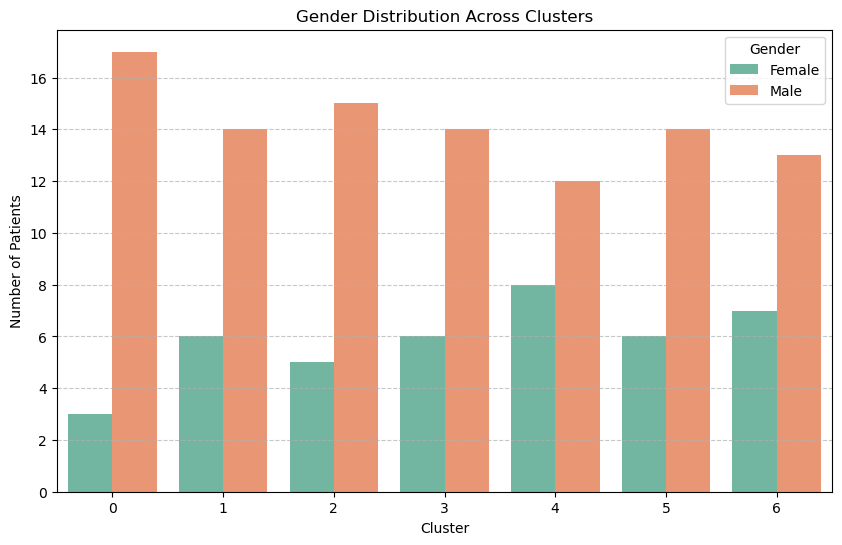

In [62]:
# Merge metadata and transformed proteomics data with cluster assignments
meta['Cluster'] = pca_df['Cluster']
data_log10_t['Cluster'] = pca_df['Cluster']

# Calculate distributions
gender_distribution = meta.groupby(['Cluster', 'Gender']).size().reset_index(name='Count')
ethnicity_distribution = meta.groupby(['Cluster', 'Ethnicity']).size().reset_index(name='Count')
smoker_distribution = meta.groupby(['Cluster', 'Smoking_History']).size().reset_index(name='Count')
metastasis_distribution = meta.groupby(['Cluster', 'Metastasis']).size().reset_index(name='Count')

# Function to plot bar charts
def plot_distribution(distribution_data, x, y, hue, title, ylabel):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=distribution_data, x=x, y=y, hue=hue, palette='Set2')
    plt.title(title)
    plt.xlabel('Cluster')
    plt.ylabel(ylabel)
    plt.legend(title=hue)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Plot distributions
plot_distribution(gender_distribution, 'Cluster', 'Count', 'Gender', 
                  'Gender Distribution Across Clusters', 'Number of Patients')

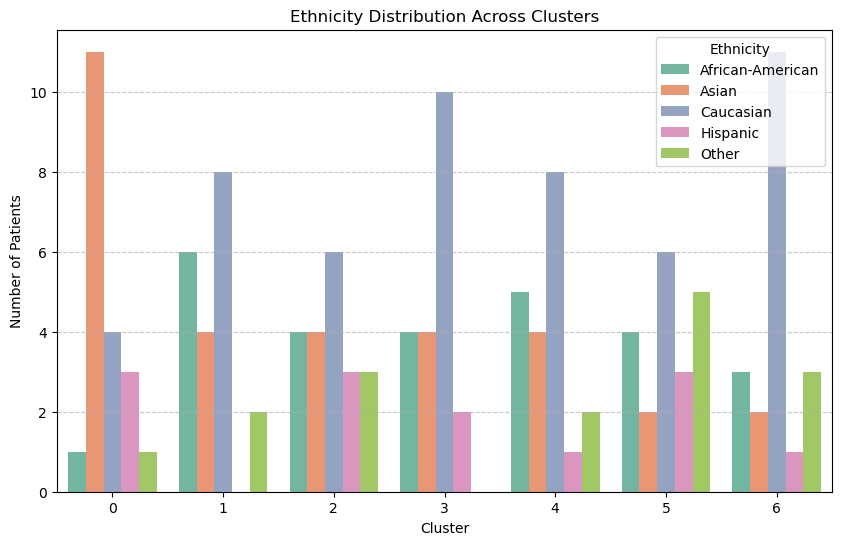

In [63]:
plot_distribution(ethnicity_distribution, 'Cluster', 'Count', 'Ethnicity', 
                  'Ethnicity Distribution Across Clusters', 'Number of Patients')


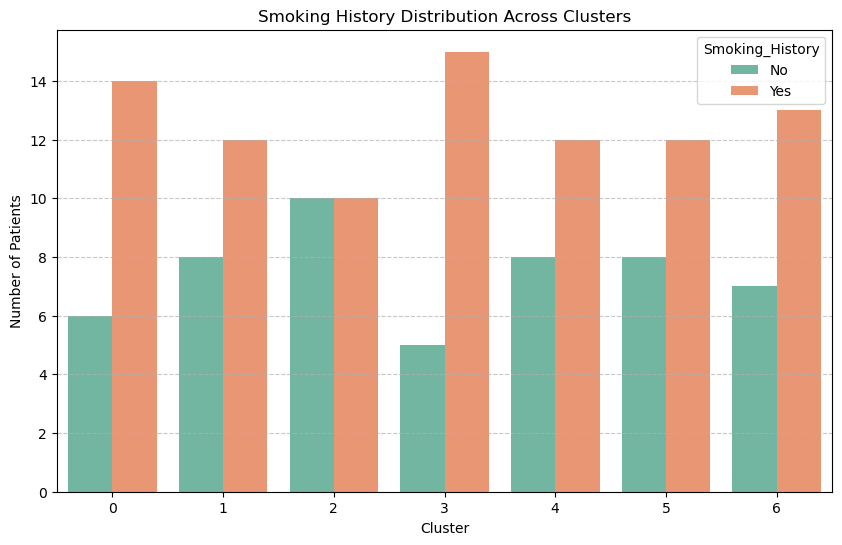

In [64]:
plot_distribution(smoker_distribution, 'Cluster', 'Count', 'Smoking_History', 
                  'Smoking History Distribution Across Clusters', 'Number of Patients')

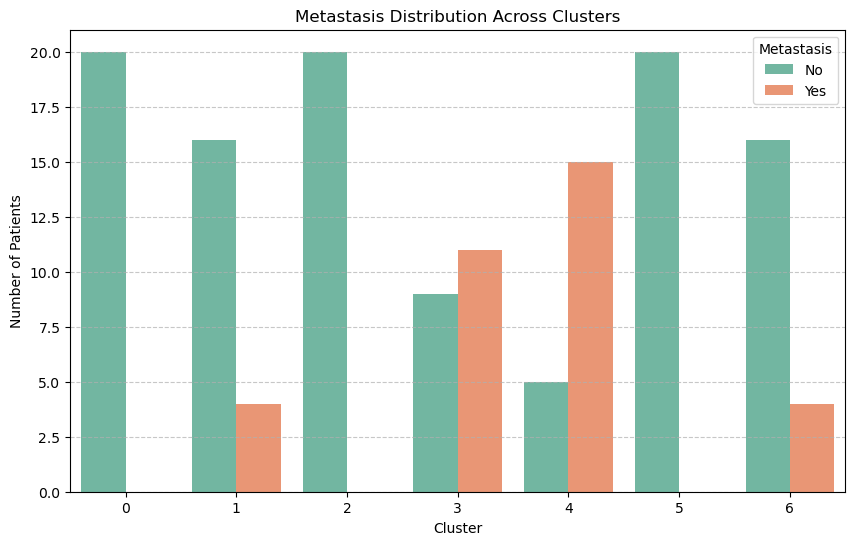

In [65]:
plot_distribution(metastasis_distribution, 'Cluster', 'Count', 'Metastasis', 
                  'Metastasis Distribution Across Clusters', 'Number of Patients')

Here’s a table summarizing the observations across the clusters:

| **Cluster** | **Gender**                    | **Ethnicity**                           | **Smoking History**            | **Metastasis**                     |
|-------------|--------------------------------|------------------------------------------|---------------------------------|-------------------------------------|
| **0**       | Male-dominated (17 M, 3 F)    | Predominantly Asian (11)                | Mostly smokers (14)            | No metastasis (100% No)            |
| **1**       | Male-dominated (14 M, 6 F)    | Balanced mix; Caucasian dominant (8)    | Mix (12 Yes, 8 No)             | Mostly no metastasis (16 No, 4 Yes)|
| **2**       | Male-dominated (15 M, 5 F)    | Evenly distributed; Caucasian (6)       | Balanced (10 Yes, 10 No)       | No metastasis (100% No)            |
| **3**       | Male-dominated (14 M, 6 F)    | Predominantly Caucasian (10)            | Most are smokers (15 Yes)      | Mixed (9 No, 11 Yes)               |
| **4**       | Male-dominated (13 M, 7 F)    | Predominantly Caucasian (11)            | Mostly smokers (13 Yes)        | Mostly no metastasis (16 No, 4 Yes)|
| **5**       | Male-dominated (14 M, 6 F)    | Diverse; mix of ethnicities (Caucasian 6, Other 5) | Balanced (12 Yes, 8 No) | No metastasis (100% No)            |
| **6**       | Slight male dominance (12 M, 8 F) | Diverse; mix of ethnicities (Caucasian 8, African-American 5) | Mostly smokers (12 Yes) | Metastasis-dominated (15 Yes, 5 No)|


This summary table and observations provide a clear overview of cluster characteristics and highlight potential areas for deeper analysis.

In [66]:
# add PCA components to proteomics data
data_log10_t['PC1'] = pca_df['PC1']
data_log10_t['PC2'] = pca_df['PC2']

In [67]:
data_log10_t

Patient_ID,A1BG,A2M,AAMDC,AARS1,AASDHPPT,AASS,ABAT,ABCC4,ABCE1,ABCF1,...,YWHAQ,YWHAZ,ZADH2,ZFHX3,ZNF185,ZNF207,ZYX,Cluster,PC1,PC2
BC.1,9.020212,10.115382,7.548952,7.887272,6.121485,7.332393,7.208225,6.360749,7.041792,7.392183,...,9.060451,9.882214,6.966818,5.697607,7.175181,7.232531,8.010454,2,11.726229,12.150759
BC.2,9.046768,9.791269,7.768564,7.984563,6.966239,6.500456,6.936725,6.282693,7.092011,6.920468,...,9.019947,9.826412,6.463925,5.555510,5.680334,6.111882,8.466601,2,13.019515,13.471006
BC.3,9.023565,9.817221,6.958650,7.666574,6.592576,6.664642,6.636041,6.539452,6.453838,6.863941,...,9.133328,9.948266,6.188596,5.794338,5.582450,6.532821,8.227177,2,12.105611,13.288120
BC.4,9.042969,9.636428,7.622297,7.244277,6.227356,6.718241,6.858483,6.505168,6.153350,6.811146,...,8.867067,9.527888,6.397068,5.521564,5.639213,7.091679,8.813754,2,12.911965,14.638459
BC.5,9.063851,9.991111,7.599927,7.753200,6.745104,6.985525,6.946059,6.724142,6.901524,6.893140,...,9.171966,9.888393,5.745079,7.928519,5.638611,7.056104,8.329520,2,14.177556,15.060495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BC.136,9.025683,9.966362,7.598278,7.672823,6.667133,7.081084,7.097051,6.777077,6.821143,7.122074,...,8.822431,9.622339,6.525433,7.555608,6.873246,6.969121,8.495487,1,-7.709012,9.438156
BC.137,8.964342,9.953742,7.623827,7.652975,6.672403,7.082928,7.095816,6.787200,6.821378,7.124102,...,8.818069,9.622885,6.578285,7.668746,6.853734,7.063833,8.419448,1,-6.708715,9.230376
BC.138,8.955925,9.962218,7.593289,7.672367,6.760001,6.941204,6.978693,6.776630,6.828868,7.082787,...,8.818379,9.623420,6.418516,7.585822,6.888596,6.973485,8.420121,1,-6.995358,9.708027
BC.139,8.975209,9.924515,7.597842,7.649295,6.660414,6.933568,6.980037,6.942810,6.825158,7.101919,...,8.817743,9.622167,6.474567,7.557151,6.942084,7.039345,8.425608,1,-6.155634,9.902990


In [68]:
# save metadata and proteomics data with clusters for further use
meta.to_csv("metadata_with_clusters.csv", index=True)
data_log10_t.to_csv("proteomics_with_clusters.csv", index=True)